Linear Least Squares Regression

442 10
(442,)


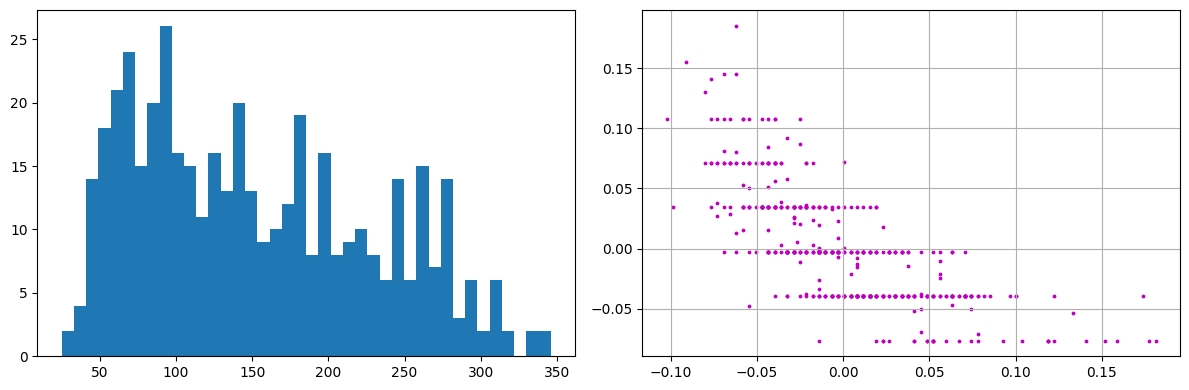

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load data, inspect and do exploratory plots
diabetes = datasets.load_diabetes()
X = diabetes.data  # data ->  features
t = diabetes.target # outputs

# Inspect sizes
NumData, NumFeatures = X.shape
print(NumData, NumFeatures)  # Shape -> 442 instances with 10 features
print(t.shape) # target values fot 442 instances.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40) # plot the targets

ax[1].scatter(X[:,6], X[:,7], c='m', s=3) # plot the 6ht feature of X against the 7th feature of X.
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

Part 2


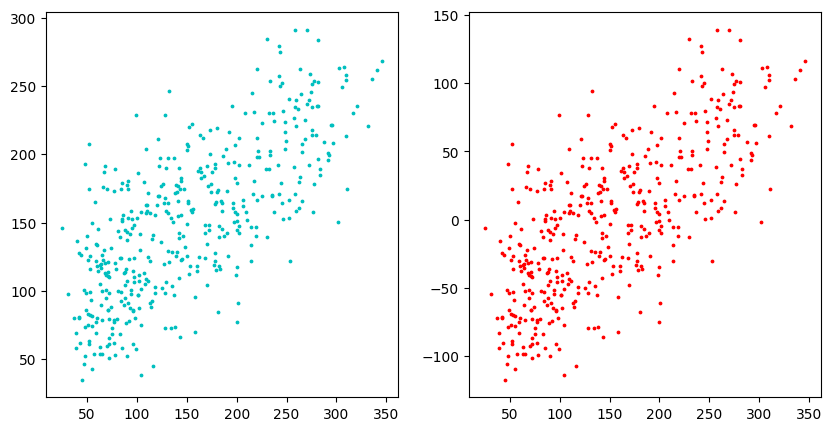

In [ ]:
# Linear regression using sklearn using least squres regression.

lin = LinearRegression() # Initialize regeression model
lin.fit(X, t) # give targets and features
th1 = lin.predict(X)

# Pseudo-incerse solution to linear regression - using above equation.
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w # w =  weights matrix.

# Plot predictions to check if they look the same!
# th1 and th2 are the data matrices that we predicted using created models using sklearn and pseudo-increase method.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='r', s=3)

Regularization


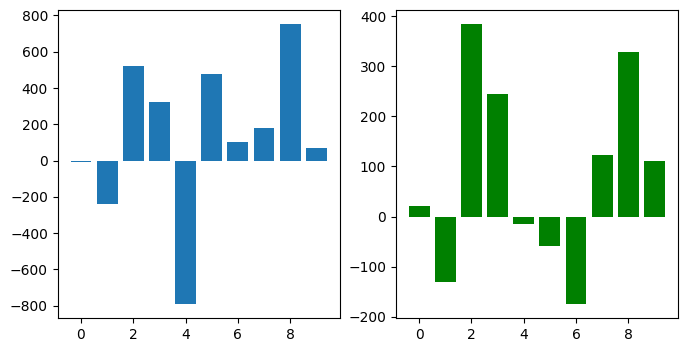

In [ ]:
gamma = 0.5  # regularizaion parameter -  change the amount of regularization we need.

wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t # this will return the regularized weights using L2(Tikhonov regularization).


# Plot the regularized weights and weights.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR, color='g')
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

Sparse Regression


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

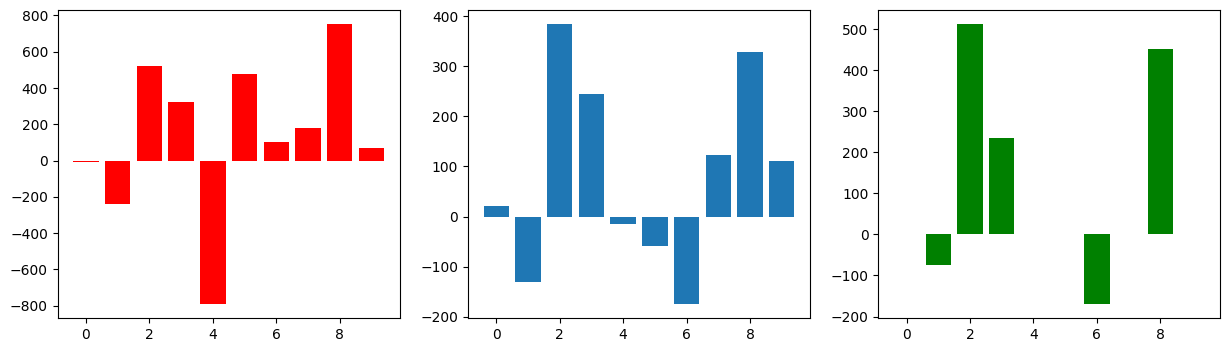

<ipython-input-8-f3067bc8858f>:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ll.fit(X, t)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.320e+05, tolerance: 2.621e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


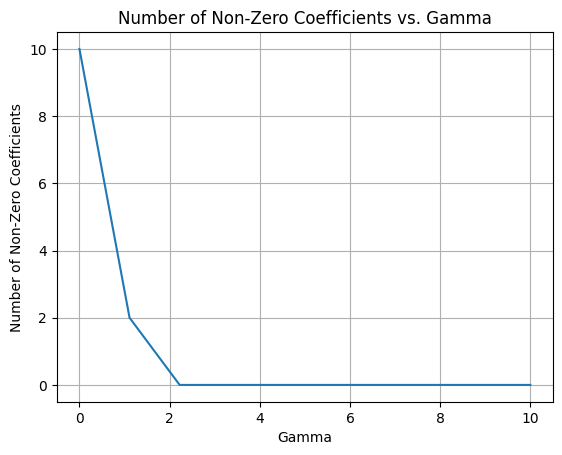

In [ ]:
from sklearn.linear_model import Lasso

# implement lassso regression. This comes with lasso regularization.
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w, color='r')
ax[1].bar(np.arange(len(wR)), wR)
ax[2].bar(np.arange(len(w)),  ll.coef_, color= 'g')

print(diabetes.DESCR)
plt.show()
plt.savefig("solutions.png")


# number of non zero vs regularization parameter.

number_of_non_zero = []
gamma_range = np.linspace(0, 10, num=10)

def count_non_zero_coefficients(coefficients):
    non_zero_count = np.count_nonzero(coefficients)
    return non_zero_count

for gamma in gamma_range:
    ll = Lasso(alpha=gamma)
    ll.fit(X, t)
    th_lasso = ll.predict(X)
    coefficients = ll.coef_
    non_zero_count = count_non_zero_coefficients(coefficients)
    number_of_non_zero.append(non_zero_count)

plt.plot(gamma_range, number_of_non_zero)
plt.xlabel('Gamma')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Number of Non-Zero Coefficients vs. Gamma')
plt.grid(True)
plt.show()


Regularization Path


Text(0, 0.5, 'Regression Coefficients')

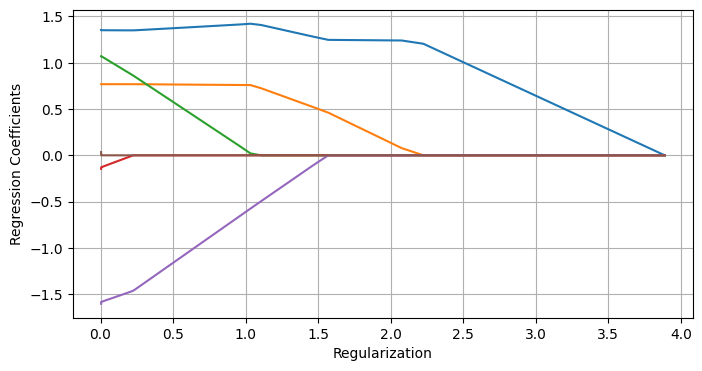

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets

# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1-1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1 = np.random.randn()
    Z2 = np.random.randn()
    y = np.append(y, 3 * Z1 - 1.5 * Z2 + 2 * np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2]) + np.random.randn(6) / 5
    X = np.vstack((X, Xarr.tolist()))

# Centering the data
X_centered = X - X.mean(axis=0)
y_centered = y - y.mean()

# Compute regressions with Lasso and return paths
alphas_lasso, coefs_lasso, _ = lasso_path(X_centered, y_centered)

# Plot each coefficient
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i, :])

ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")


Solubility Prediction


(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)
(932, 2255)
(932,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+02, tolerance: 2.461e-01
  model = cd_fast.enet_coordinate_descent(


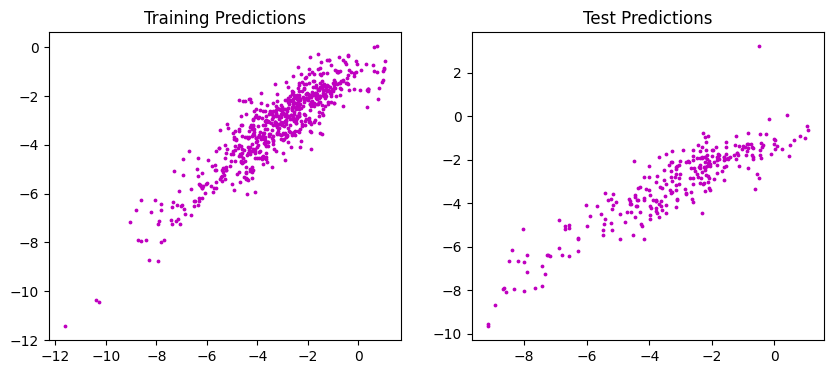

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+02, tolerance: 2.461e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+02, tolerance: 2.461e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+02, tolerance: 2.461e

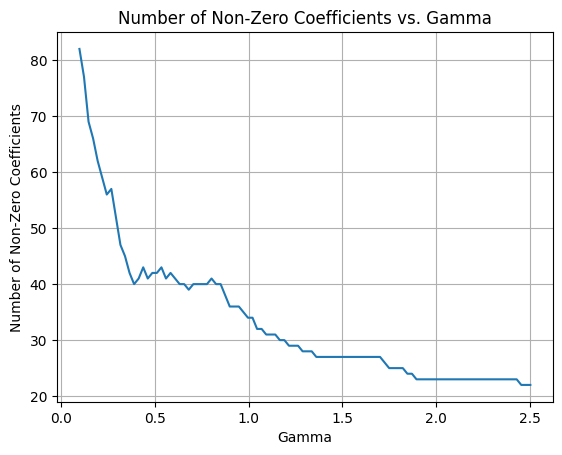

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load the data
sol = pd.read_excel("/content/Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)

# instances = 932 features = 2256
# Extract target variable - targets
t = sol["LogS.M."].values

# Extract feature variables - features
colnames = sol.columns # take all the columns
X = sol[colnames[5:len(colnames) - 1]] # take 5 to the one before last one.
N, p = X.shape
print(X.shape)
print(t.shape)

# Split data into training and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

# Regularized regression with Lasso
gamma = 2.3
lasso = Lasso(alpha=gamma)
lasso.fit(X_train, t_train)

# Predictions on training and test sets
th_train = lasso.predict(X_train)
th_test = lasso.predict(X_test)

# Plot training and test predictions

# true slubility vs predicted solubility for tarin set
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].set_title("Training Predictions")

# true slubility vs predicted solubility for test set
ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].set_title("Test Predictions")

plt.show()

number_of_non_zero = []
gamma_range = np.linspace(0.1, 2.5, num=100)

def count_non_zero_coefficients(coefficients):
    non_zero_count = np.count_nonzero(coefficients)
    return non_zero_count

for gamma in gamma_range:
    lasso = Lasso(alpha=gamma)
    lasso.fit(X_train, t_train)
    coefficients = lasso.coef_
    non_zero_count = count_non_zero_coefficients(coefficients)
    number_of_non_zero.append(non_zero_count)

plt.plot(gamma_range, number_of_non_zero)
plt.xlabel('Gamma')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Number of Non-Zero Coefficients vs. Gamma')
plt.grid(True)
plt.show()


# accuracy
# acuracy_list = []
# gamma_range = np.linspace(0.1, 2.5, num=100)


# from sklearn.metrics import r2_score

# def evaluate_model(model, X_test, t_test):
#     # Predict the target values using the test features
#     predictions = model.predict(X_test)

#     # Calculate the R-squared score to evaluate the model's accuracy
#     accuracy = r2_score(t_test, predictions)

#     return accuracy


# for gamma in gamma_range:
#   lasso = Lasso(alpha=gamma)
#   lasso.fit(X_train, t_train)

#   accuracy = evaluate_model(lasso, X_test, t_test)

#   acuracy_list.append(accuracy)

# plt.plot(gamma_range, acuracy_list)

# plt.xlabel('Gamma')
# plt.ylabel('Accuracy for the test set ')
# plt.title('Accuracy for the test set vs. Gamma')
# plt.grid(True)
# plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+02, tolerance: 2.461e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+02, tolerance: 2.461e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+02, tolerance: 2.461e

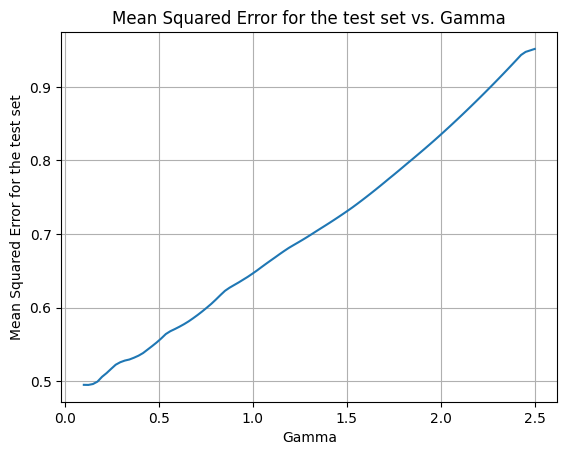

In [ ]:
# accuracy
import numpy as np

error_list = []
gamma_range = np.linspace(0.1, 2.5, num=100)

from sklearn.metrics import mean_squared_error

def evaluate_model_mse(model, X_test, t_test):
    # Predict the target values using the test features
    predictions = model.predict(X_test)

    # Calculate the mean squared error to evaluate the model's accuracy
    mse = mean_squared_error(t_test, predictions)

    return mse

for gamma in gamma_range:
    lasso = Lasso(alpha=gamma)
    lasso.fit(X_train, t_train)

    error = evaluate_model_mse(lasso, X_test, t_test)

    error_list.append(error)

plt.plot(gamma_range, error_list)

plt.xlabel('Gamma')
plt.ylabel('Mean Squared Error for the test set')
plt.title('Mean Squared Error for the test set vs. Gamma')
plt.grid(True)
plt.show()


**top 10 features**

(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)
(932, 2255)
(932,)
Top 10 features: Index(['SpMax4_Bh(m)', 'P_VSA_v_3', 'P_VSA_p_3', 'MLOGP', 'MLOGP2', 'ALOGP',
       'ALOGP2', 'BLTF96', 'BLTD48', 'BLTA96'],
      dtype='object')
Test MSE with all features: 1.0671905220190105
T

Text(0.5, 1.0, 'All Features')

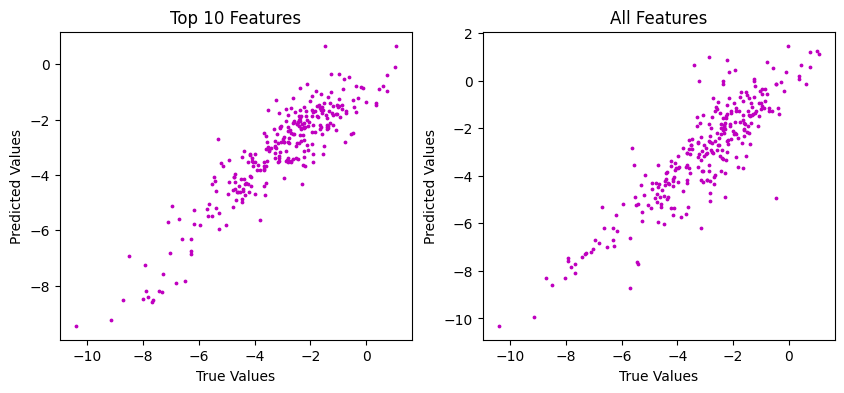

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load the data
sol = pd.read_excel("/content/Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)

# instances = 932 features = 2256
# Extract target variable - targets
t = sol["LogS.M."].values

# Extract feature variables - features
colnames = sol.columns # take all the columns
X = sol[colnames[5:len(colnames) - 1]] # take 5 to the one before last one.
N, p = X.shape
print(X.shape)
print(t.shape)

# Split data into training and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)



from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


from sklearn.feature_selection import SelectKBest, f_regression
# Define the feature selection method
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector to the training data
selector.fit(X_train, t_train)

# Get the indices of the top 10 features
idx_top10 = selector.get_support(indices=True)

# Get the names of the top 10 features
top10_features = X_train.columns[idx_top10]
print(f'Top 10 features: {top10_features}')

optimal_alpha_error = 0.5

# Train a Lasso regression model on all features
ridge_all = Ridge(alpha=optimal_alpha_error).fit(X_train, t_train)

# Evaluate the model on the test data
t_pred_all = ridge_all.predict(X_test)
mse_all = mean_squared_error(t_test, t_pred_all)
print(f'Test MSE with all features: {mse_all}')

# Train a Lasso regression model on the top 10 features
ridge_top10 = Ridge(alpha=optimal_alpha_error).fit(X_train[top10_features], t_train)

# Evaluate the model on the test data
t_pred_top10 = ridge_top10.predict(X_test[top10_features])
mse_top10 = mean_squared_error(t_test, t_pred_top10)
print(f'Test MSE with top 10 features: {mse_top10}')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_test, t_pred_top10, c='m', s=3)
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Top 10 Features')

ax[1].scatter(t_test, t_pred_all, c='m', s=3)
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('All Features')